In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

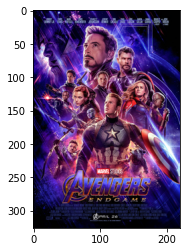

In [2]:
image = cv2.imread("Avengers.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [3]:
orig_shape=image.shape
print("Original shape of image is: ", orig_shape)

pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
print("Pixel_values shape is: ", pixel_values.shape)

Original shape of image is:  (326, 220, 3)
Pixel_values shape is:  (71720, 3)


In [4]:
def dist(a, b):
    return np.sqrt(np.sum((a-b)**2))
np.random.seed(42)
class K_Means():
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K=K
        self.max_iters=max_iters
        self.plot_steps = plot_steps
        
        self.centroids = []
        self.clusters = [[] for _ in range(self.K)]
        
    def predict(self, X):
        self.X = X
        self.n_datapoints, self.n_features = X.shape
        random_sample_index = np.random.choice(self.n_datapoints, self.K, replace=False)
        self.centroids = [self.X[index] for index in random_sample_index]
        
        for _ in range(100):
            self.clusters = self.assign_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            prev_centroids = self.centroids
            self.centroids = self.update_centroids(self.clusters)
            
            if self.same_cluster(prev_centroids, self.centroids):
                break
            if self.plot_steps:
                self.plot()
            
        return self.cluster_labels(self.clusters)
    
    def cluster_labels(self, clusters):
        labels = np.empty(self.n_datapoints)
        
        for cluster_index, cluster in enumerate(self.clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_index
        
        return labels
            
    def assign_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for index, sample in enumerate(self.X):
            centroid_index = self.closest_centroid(sample, centroids)
            clusters[centroid_index].append(index)
        return clusters
    
    def closest_centroid(self, sample, centroids):
        distances = [dist(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index
    
    def update_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_index, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_index] = cluster_mean
        return centroids
    
    def same_cluster(self, prev_centroids, centroids):
        distances = [dist(prev_centroids[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def centroids_final(self):
        return self.centroids

K =  1


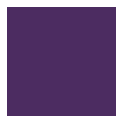

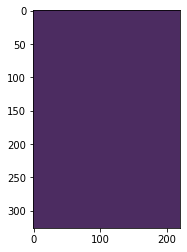

K =  2


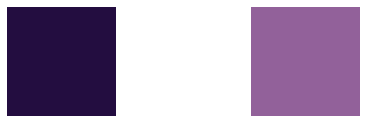

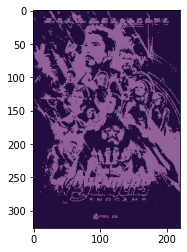

K =  3


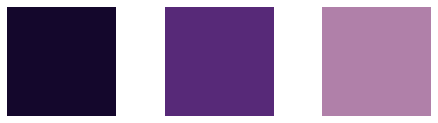

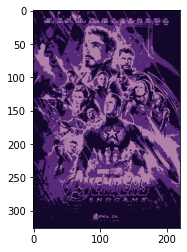

K =  4


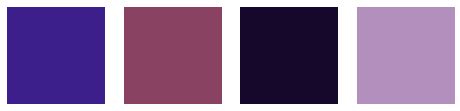

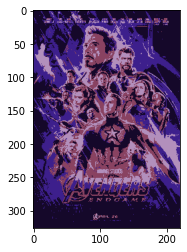

K =  5


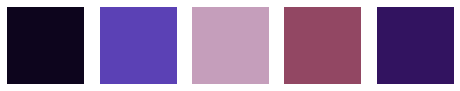

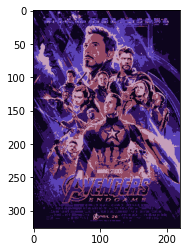

K =  10


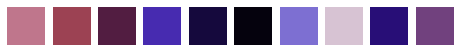

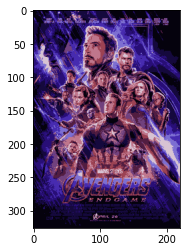

K =  15


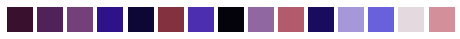

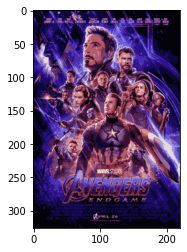

K =  20


In [ ]:
for j in range(1, 46):
    if((j<=5) or (j==10) or (j==15) or (j==20) or (j==25) or (j==35) or (j==45) ):
        print("K = ", j)
        
        Kmeans = K_Means(K=j, max_iters=100)  
        y_pred = Kmeans.predict(pixel_values) 
        y_pred = y_pred.astype(int)
        centers = np.uint8(Kmeans.centroids_final())
        centers
        labels = y_pred.flatten()
        
        i = 1

        plt.figure(0,figsize=(8,2))

        # Storing info in color array
        colors = []

        for each_col in centers:
            plt.subplot(1,j,i)
            plt.axis("off")
            i+=1
    
            colors.append(each_col)
    
            # Color Swatch
            a = np.zeros((100,100,3),dtype='uint8')
            a[:,:,:] = each_col
            plt.imshow(a)
    
        plt.show()

        new_image = centers[labels.flatten()]
        new_image = new_image.reshape(orig_shape)
        plt.imshow(new_image)
        plt.show()